In [1]:
from laserembeddings import Laser
import numpy as np
from indicnlp.tokenize import sentence_tokenize
import os
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, BisectingKMeans, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score
from IPython.display import clear_output
import matplotlib.pyplot as plt
import pickle as pk
from embedder import Embedder
from matplotlib.font_manager import FontProperties
from transformers import BertTokenizer, BertModel
from sentence_transformers import SentenceTransformer

laser = Laser()
embedder = SentenceTransformer('distiluse-base-multilingual-cased')
pca_1 = PCA(n_components=2)
pca_2 = PCA(n_components=2)

In [8]:
f1 = open("final_data/en-hi/train.hi", "r")
f2 = open("final_data/en-hi/train.en", "r")

embeddings_1 = []
embeddings_2 = []

for i in range(10000):
    embedding_1 = laser.embed_sentences([f1.readline()], lang=['hi'])
    embeddings_1.append(embedding_1)
    embedding_2 = laser.embed_sentences([f2.readline()], lang=['en'])
    embeddings_2.append(embedding_2)
    clear_output()
    print(i)

embeddings_1 = np.array([embeddings_1]).squeeze()
embeddings_2 = np.array([embeddings_2]).squeeze()

9999


In [9]:
pca_1.fit(embeddings_1)
pca_2.fit(embeddings_2)

PCA(n_components=2)

In [19]:
f1 = open("final_data/en-hi/train.hi", "r")
f2 = open("final_data/en-hi/train.en", "r")

pairs = []
x_1 = []
y_1 = []
x_2 = []
y_2 = []
s_1 = []
s_2 = []
e = Embedder("pca_hi.pkl", "pca_en.pkl")

for i in range(10000):
    # embedding_1 = laser.embed_sentences([f1.readline()], lang=['hi'])
    # embedding_2 = laser.embed_sentences([f2.readline()], lang=['en'])
    # point_1 = pca_1.transform(embedding_1)
    # # x_1.append(point_1[0, 0])
    # # y_1.append(point_1[0, 1])
    # point_2 = pca_2.transform(embedding_2)
    # # x_2.append(point_2[0, 0])
    # # y_2.append(point_2[0, 1])
    s1 = f1.readline()
    s2 = f2.readline()
    point_1, point_2 = e.embed(s1, s2)
    # pair = (point_1[0,0], point_1[0,1], point_2[0,0], point_2[0,1], np.linalg.norm(point_1 - point_2))
    pair = (point_1[0], point_1[1], point_2[0], point_2[1], np.linalg.norm(point_1 - point_2), s1, s2)
    pairs.append(pair)
    clear_output()
    print(i)

pairs.sort(key = lambda x: x[4])

9999


In [17]:
x_1 = []
y_1 = []
x_2 = []
y_2 = []
s_1 = []
s_2 = []
pairs = pk.load(open("pairs.pkl", "rb"))
for i in range(20):
    # if i not in [1,7,10]:
    #     continue
    # if i not in [4,5,16]:
    #     continue
    # if i not in [9,11,15]:
    #     continue
    x_1.append(pairs[i][0])
    y_1.append(pairs[i][1])
    x_2.append(pairs[i][2])
    y_2.append(pairs[i][3])
    s_1.append(pairs[i][5])
    s_2.append(pairs[i][6])

In [18]:
s_1

['अतएव उसने एक अभियान का आयोजन किया\n',
 'ठ्ठ यह मेरा सौभाग्य है कि मुझे सरदार साहब की इस विशाल प्रतिमा को देश को समर्पित करने का अवसर मिला है।\n',
 'अग्निशमन एवं राहत कर्मियों को घटनास्थल की ओर रवाना कर दिया गया है।\n',
 'एक अन्य पहलू प्रसारक स्टार इंडिया है जिसने IPL और ICC प्रतियोगिताओं में भी निवेश किया है।\n',
 'वैदेही को जल्द ही पता चलता है कि वह गर्भवती है।\n',
 'शेष किसानों की कर्जमाफी की प्रक्रिया चालू है.\n',
 'जिसकी वजह से वह क्रिकेट प्रशंसकों के बीच काफी फेमस हो गई थी।\n',
 'यहाँ चावल मुख्य फसल हैं, हालांकि टोक्यो और योकोहामा के आसपास के क्षेत्र को महानगरीय बाजार के लिए प्राकृतिक उद्यान उत्पाद पैदा करने कि लिये विकसित किया गया हैं।\n',
 '"इसी अवधि में बैंड ने ""रेलिक्स"" का भी निर्माण किया, पिंक फ़्लॉइड के पूर्व कार्यों का एक संकलन एल्बम."\n',
 'क्या पटना के कुछ हिस्सों में पानी ही एकमात्र समस्या है?\n',
 'पुलिस आरोपितों का पता लगा रही है।\n',
 'देश के कोरोना योद्धाओं, हमारे डॉक्टर- नर्सेस, सफाई कर्मी-पुलिसकर्मी का पूरा सम्मान करें\n',
 'ये समझौता ज्ञापन विकसित बाजार की उम्

In [19]:
s_2

['He pursued a certain course.\n',
 '"I am fortunate to dedicate this statue of Sardar Sahab to the nation."""\n',
 'Rescue personnel and fire brigades have rushed to the spot.\n',
 'The other aspect will be broadcaster, Star India, which has invested heavily in both the IPL as well as ICC events.\n',
 'Soon Mara learns that she is pregnant.\n',
 'The process of waiving off the loans of the remaining farmers is underway.\n',
 'Thats what as made him very popular amongst cricket lovers.\n',
 'Rice is the principal crop, although the zone around Tokyo and Yokohama has been landscaped to grow garden produce for the metropolitan market.\n',
 "In the same period, the group also produced Relics, a compilation album of some of Pink Floyd's earlier works.\n",
 'Is water in some parts of Patna the only problem we have?\n',
 'Police are searching for the accused.\n',
 'Pay utmost respect to our nations Corona Warriors our doctors and nurses, sanitation workers and police force.\n',
 'These MoUsw

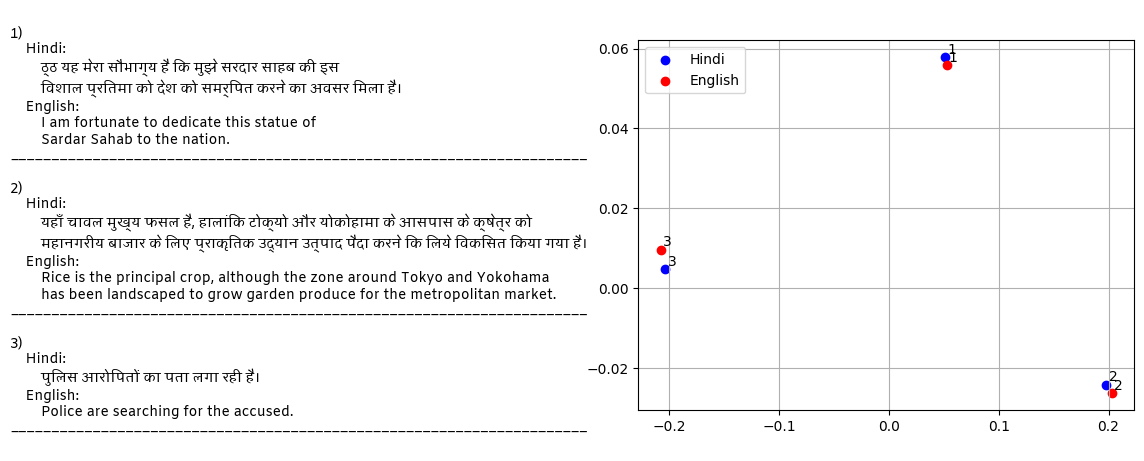

In [8]:
plt.scatter(x_1, y_1, c='b')
plt.scatter(x_2, y_2, c='r')
plt.legend(["Hindi", "English"], loc ="upper left")
for i in range(len(x_1)):
    plt.annotate(str(i+1), (x_1[i]+0.002, y_1[i]+0.001))
    plt.annotate(str(i+1), (x_2[i]+0.002, y_2[i]+0.001))

txt = '''
1)
    Hindi: 
        ठ्ठ यह मेरा सौभाग्य है िक मुझे सरदार साहब की इस 
        िवशाल प्रितमा को देश को समर्िपत करने का अवसर िमला है।
    English: 
        I am fortunate to dedicate this statue of 
        Sardar Sahab to the nation.
______________________________________________________________________

2)
    Hindi: 
        यहाँ चावल मुख्य फसल हैं, हालांिक टोक्यो और योकोहामा के आसपास के क्षेत्र को 
        महानगरीय बाजार के िलए प्राकृितक उद्यान उत्पाद पैदा करने िक िलये िवकिसत िकया गया हैं।
    English: 
        Rice is the principal crop, although the zone around Tokyo and Yokohama 
        has been landscaped to grow garden produce for the metropolitan market.
______________________________________________________________________

3)
    Hindi: 
        पुिलस आरोिपतों का पता लगा रही है।
    English: 
        Police are searching for the accused.
______________________________________________________________________
'''

plt.text(-0.8, -0.04, txt, fontsize=10, fontproperties=FontProperties(fname = 'Amiko-Regular.ttf'))
plt.grid(True)
# plt.subplots_adjust(left=0.25)
plt.savefig('foo.png')
plt.show()

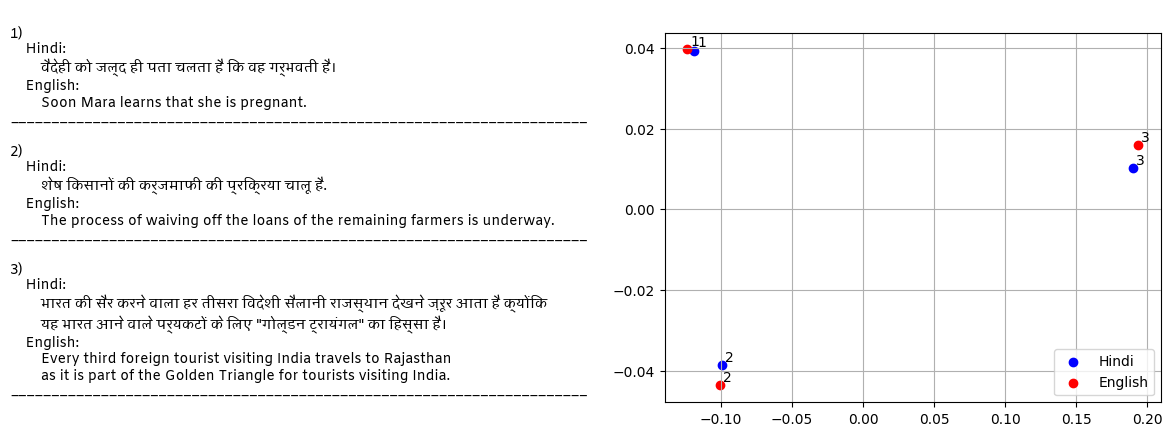

In [12]:
plt.scatter(x_1, y_1, c='b')
plt.scatter(x_2, y_2, c='r')
plt.legend(["Hindi", "English"], loc ="lower right")
for i in range(len(x_1)):
    plt.annotate(str(i+1), (x_1[i]+0.002, y_1[i]+0.001))
    plt.annotate(str(i+1), (x_2[i]+0.002, y_2[i]+0.001))

txt = '''
1)
    Hindi: 
        वैदेही को जल्द ही पता चलता है िक वह गर्भवती है।
    English: 
        Soon Mara learns that she is pregnant.
______________________________________________________________________

2)
    Hindi: 
        शेष िकसानों की कर्जमाफी की प्रिक्रया चालू है.
    English: 
        The process of waiving off the loans of the remaining farmers is underway.
______________________________________________________________________

3)
    Hindi: 
        भारत की सैर करने वाला हर तीसरा िवदेशी सैलानी राजस्थान देखने ज़रूर आता है क्योंिक 
        यह भारत आने वाले पर्यकटों के िलए "गोल्डन ट्रायंगल" का िहस्सा है।
    English: 
        Every third foreign tourist visiting India travels to Rajasthan 
        as it is part of the Golden Triangle for tourists visiting India.
______________________________________________________________________
'''

plt.text(-0.6, -0.05, txt, fontsize=10, fontproperties=FontProperties(fname = 'Amiko-Regular.ttf'))
plt.grid(True)
# plt.subplots_adjust(left=0.25)
plt.savefig('foo.png')
plt.show()

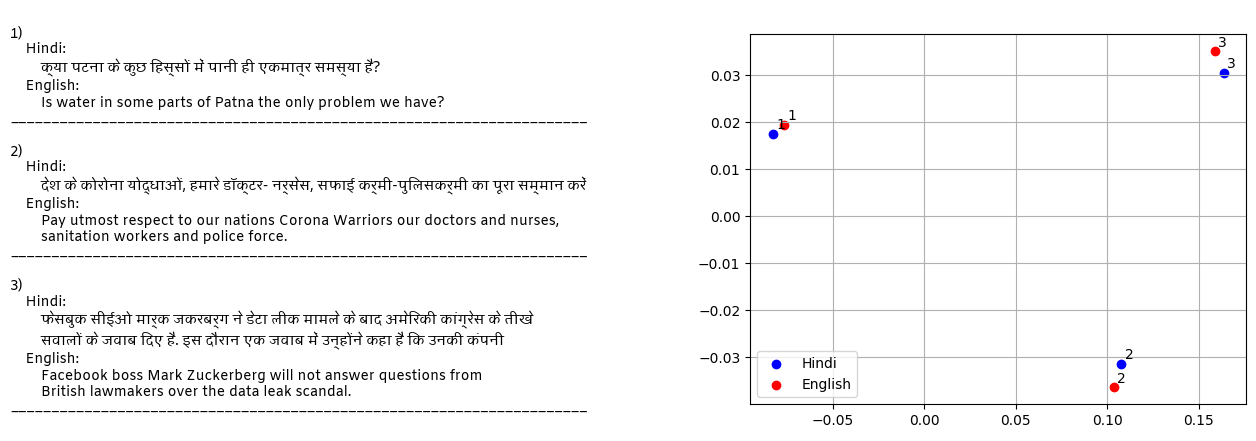

In [16]:
plt.scatter(x_1, y_1, c='b')
plt.scatter(x_2, y_2, c='r')
plt.legend(["Hindi", "English"], loc ="lower left")
for i in range(len(x_1)):
    plt.annotate(str(i+1), (x_1[i]+0.002, y_1[i]+0.001))
    plt.annotate(str(i+1), (x_2[i]+0.002, y_2[i]+0.001))

txt = '''
1)
    Hindi: 
        क्या पटना के कुछ िहस्सों में पानी ही एकमात्र समस्या है?
    English: 
        Is water in some parts of Patna the only problem we have?
______________________________________________________________________

2)
    Hindi: 
        देश के कोरोना योद्धाओं, हमारे डॉक्टर- नर्सेस, सफाई कर्मी-पुिलसकर्मी का पूरा सम्मान करें
    English: 
        Pay utmost respect to our nations Corona Warriors our doctors and nurses, 
        sanitation workers and police force.
______________________________________________________________________

3)
    Hindi: 
        फेसबुक सीईओ मार्क जकरबर्ग ने डेटा लीक मामले के बाद अमेिरकी कांग्रेस के तीखे 
        सवालों के जवाब िदए हैं. इस दौरान एक जवाब में उन्होंने कहा है िक उनकी कंपनी
    English: 
        Facebook boss Mark Zuckerberg will not answer questions from 
        British lawmakers over the data leak scandal.
______________________________________________________________________
'''

plt.text(-0.5, -0.045, txt, fontsize=10, fontproperties=FontProperties(fname = 'Amiko-Regular.ttf'))
plt.grid(True)
# plt.subplots_adjust(left=0.25)
plt.savefig('foo.png')
plt.show()

In [3]:
embeddings = embedder.encode(['अतएव उसने एक अभियान का आयोजन किया', 'He pursued a certain course'])

In [7]:
np.linalg.norm(embeddings[0]-embeddings[1])

0.89007974

In [71]:
# from embedder import Embedder
# e = Embedder("pca_hi.pkl", "pca_en.pkl")
# e.embed("जिसके जवाब में पाक ने अच्छी शुरुआत की थी", "In reply, Pakistan got off to a solid start")

# pk.dump(pca_2, open("pca_en.pkl","wb"))
# pca = pk.load(open("pca_en.pkl", "rb"))

In [2]:
path = "Articles Dataset/"
langs = ["English/", "Nepali/", "Hindi/"]

class Article:
    emb = None
    pca_emb = None

    def __init__(self, text, lang, cat, fname):
        self.text = text
        self.lang = lang
        self.cat = cat
        self.fname = fname

    def sen_split(self):
        self.text = sentence_tokenize.sentence_split(self.text, lang=self.lang)

articles = []

for lang in langs:
    categories = [f for f in os.listdir(path + lang) if os.path.isdir(os.path.join(path + lang, f))]
    for category in categories:
        for filename in os.listdir(path + lang + category):
            if filename[:-4] != "metadata":
                with open(os.path.join(path + lang + category, filename), 'r') as file:
                    articles.append(Article(file.read(), lang[:3].lower(), category.lower(), filename.lower()))

def getlang(l):
    if l == "eng":
        return "eng"
    if l == "hin":
        return "hi"
    if l == "nep":
        return "hi"
    
for article in articles:
    article.sen_split()
    article.emb = np.mean(laser.embed_sentences(article.text, lang=getlang(article.lang)), axis=0)

embedding_space = []

for article in articles:
    embedding_space.append(article.emb)

embedding_space = np.array(embedding_space)
pca = PCA(n_components=2)
pca.fit(embedding_space)
for article in articles:
    article.pca_emb = pca.transform(article.emb.reshape(1, -1))

color_dict = {
    'sports': '#FF5733',  # orange
    'politics': '#6B8E23',  # olive green
    'entertainment': '#BA55D3',  # medium purple
    'economics': '#1E90FF',  # dodger blue
    'crime': '#FF1493'  # deep pink
}

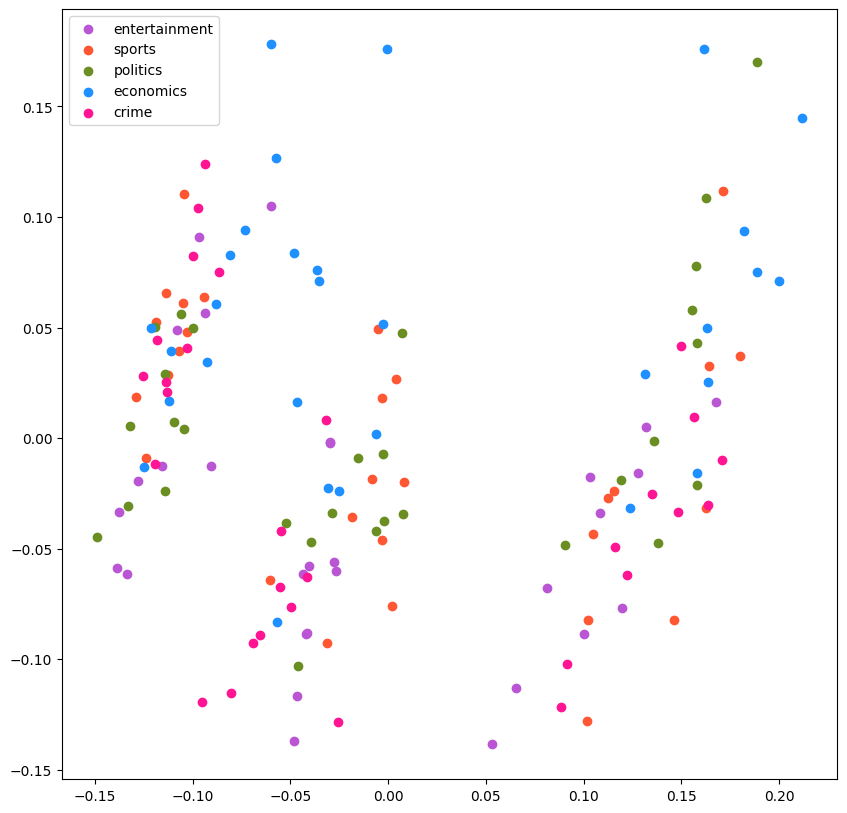

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.subplots()

emb_by_cat = {}

for article in articles:
    category = article.cat
    if category not in emb_by_cat:
        emb_by_cat[category] = []
    emb_by_cat[category].append(article.pca_emb)

for category, pca_embs in emb_by_cat.items():
    x = [pca_emb[0][0] for pca_emb in pca_embs]
    y = [pca_emb[0][1] for pca_emb in pca_embs]
    color = color_dict[category]
    ax.scatter(x, y, color=color, label=category)

ax.legend()

plt.show()

In [4]:
real = []
cats = {"entertainment": 0,
        "sports": 1,
        "politics": 2,
        "crime": 3,
        "economics": 4}
for a in articles:
    real.append(cats[a.cat])
real = np.array(real)

In [16]:
kmeans = KMeans(n_clusters=5)
labels = kmeans.fit_predict(embedding_space)

clusters = {}

for i in range(len(labels)):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(articles[i])

# for cluster, arcls in clusters.items():
#     print(f"Cluster {cluster}:")
#     for article in arcls:
#         print(article.lang + ":" + article.cat + ":" + article.fname)
#     print("\n")

print(adjusted_mutual_info_score(list(labels), list(real)))
print(adjusted_rand_score(list(labels), list(real)))

0.08841227288152351
0.03857036755248809


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
bisect_means = BisectingKMeans(n_clusters=5)
labels = bisect_means.fit_predict(embedding_space)

clusters = {}

for i in range(len(labels)):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(articles[i])

# for cluster, arcls in clusters.items():
#     print(f"Cluster {cluster}:")
#     for article in arcls:
#         print(article.lang + ":" + article.cat + ":" + article.fname)
#     print("\n")

print(adjusted_mutual_info_score(list(labels), list(real)))
print(adjusted_rand_score(list(labels), list(real)))

0.02219177052361731
0.003978269774630302


In [18]:
agg = AgglomerativeClustering(n_clusters=5)
labels = agg.fit_predict(embedding_space)

clusters = {}

for i in range(len(labels)):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(articles[i])

# for cluster, arcls in clusters.items():
#     print(f"Cluster {cluster}:")
#     for article in arcls:
#         print(article.lang + ":" + article.cat + ":" + article.fname)
#     print("\n")

print(adjusted_mutual_info_score(list(labels), list(real)))
print(adjusted_rand_score(list(labels), list(real)))

0.0794721261930275
0.018645379229651437


In [19]:
spec = SpectralClustering(n_clusters=5)
labels = spec.fit_predict(embedding_space)

clusters = {}

for i in range(len(labels)):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(articles[i])

# for cluster, arcls in clusters.items():
#     print(f"Cluster {cluster}:")
#     for article in arcls:
#         print(article.lang + ":" + article.cat + ":" + article.fname)
#     print("\n")

print(adjusted_mutual_info_score(list(labels), list(real)))
print(adjusted_rand_score(list(labels), list(real)))

0.2185164513629231
0.1251132815526284


In [20]:
dbscan = DBSCAN(eps=0.375)
labels = dbscan.fit_predict(embedding_space)

clusters = {}

for i in range(len(labels)):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(articles[i])

# for cluster, arcls in clusters.items():
#     print(f"Cluster {cluster}:")
#     for article in arcls:
#         print(article.lang + ":" + article.cat + ":" + article.fname)
#     print("\n")

print(adjusted_mutual_info_score(list(labels), list(real)))
print(adjusted_rand_score(list(labels), list(real)))

0.0
0.0
